# Libraries

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

# Load Data

In [146]:
pd_graph = pd.read_csv("data_tr.csv")
pd_graph

,u,v,t,h
0,8538,53245,82,9
1,32991,41149,39,4
2,30104,35030,25,4
3,26292,48613,37,1
4,31603,32991,59,9
...,...,...,...,...
48604,12751,71902,98,4
48605,6430,76576,89,6
48606,1021,6872,83,5
48607,28392,55610,75,8


In [148]:
sorted(list(set(pd_graph.v.append(pd_graph.u))))

/var/folders/l3/l0vfq_n54s9d8739l34r9qv00000gn/T/ipykernel_9501/4019072659.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[2,
 19,
 22,
 25,
 26,
 29,
 31,
 33,
 38,
 40,
 46,
 50,
 51,
 55,
 67,
 72,
 76,
 79,
 88,
 95,
 96,
 117,
 122,
 125,
 127,
 128,
 140,
 141,
 144,
 158,
 162,
 186,
 191,
 195,
 220,
 221,
 230,
 234,
 236,
 238,
 241,
 242,
 244,
 245,
 249,
 252,
 254,
 263,
 268,
 276,
 284,
 287,
 290,
 293,
 294,
 305,
 313,
 315,
 316,
 318,
 328,
 331,
 332,
 340,
 341,
 358,
 365,
 368,
 373,
 374,
 378,
 379,
 383,
 390,
 391,
 392,
 395,
 399,
 413,
 417,
 418,
 419,
 423,
 428,
 432,
 437,
 439,
 445,
 461,
 462,
 464,
 468,
 472,
 480,
 482,
 487,
 503,
 518,
 525,
 527,
 535,
 541,
 563,
 571,
 576,
 589,
 592,
 594,
 605,
 607,
 610,
 623,
 628,
 638,
 647,
 655,
 658,
 671,
 677,
 678,
 695,
 709,
 714,
 719,
 720,
 782,
 790,
 799,
 800,
 806,
 822,
 823,
 837,
 845,
 847,
 865,
 866,
 869,
 872,
 878,
 939,
 942,
 945,
 954,
 957,
 972,
 979,
 990,
 1005,
 1014,
 1021,
 1022,
 1026,
 1030,
 1032,
 1036,
 1042,
 1043,
 1046,
 1053,
 1064,
 1065,
 1078,
 1086,
 1088,
 1089,
 1090,
 

# EDA

In [103]:
pd_graph.shape

(48609, 4)

In [104]:
pd_graph.u.value_counts()

32215    1099
4098      167
13815     128
22842     126
13190     107
         ... 
25800       1
14134       1
60229       1
24433       1
67920       1
Name: u, Length: 9300, dtype: int64

/var/folders/l3/l0vfq_n54s9d8739l34r9qv00000gn/T/ipykernel_9501/2752268001.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: ylabel='Density'>

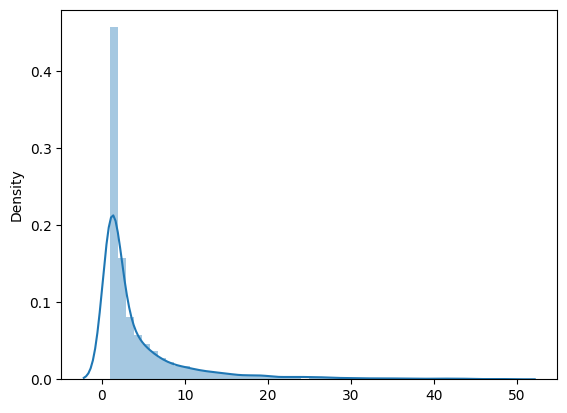

In [105]:
src_degree = np.array(list(pd_graph.u.value_counts()))
sns.distplot(src_degree[src_degree < 50])

In [106]:
pd_graph.v.value_counts()

32215    712
83552    140
80636    110
81115    106
76576     97
        ... 
29093      1
62930      1
6098       1
52621      1
6872       1
Name: v, Length: 9437, dtype: int64

/var/folders/l3/l0vfq_n54s9d8739l34r9qv00000gn/T/ipykernel_9501/794328783.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: ylabel='Density'>

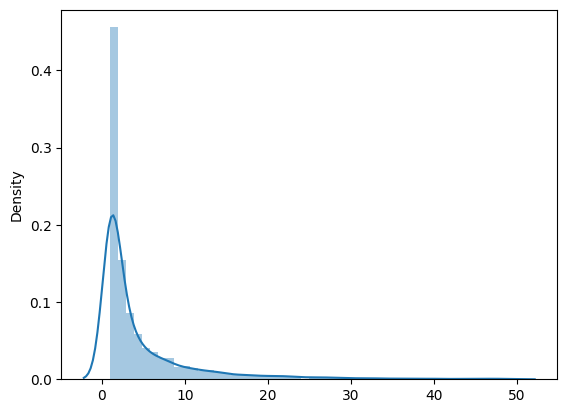

In [107]:
dst_degree = np.array(list(pd_graph.v.value_counts()))
sns.distplot(dst_degree[dst_degree < 50])

In [108]:
pd_graph.t.value_counts()

82    491
17    491
88    491
11    491
26    491
     ... 
18    491
81    491
79    491
19    491
33    491
Name: t, Length: 99, dtype: int64

In [109]:
pd_graph.h.value_counts()

2    4924
1    4923
3    4923
4    4922
0    4921
6    4917
5    4914
7    4895
8    4814
9    4456
Name: h, dtype: int64

/var/folders/l3/l0vfq_n54s9d8739l34r9qv00000gn/T/ipykernel_9501/1175231524.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: >

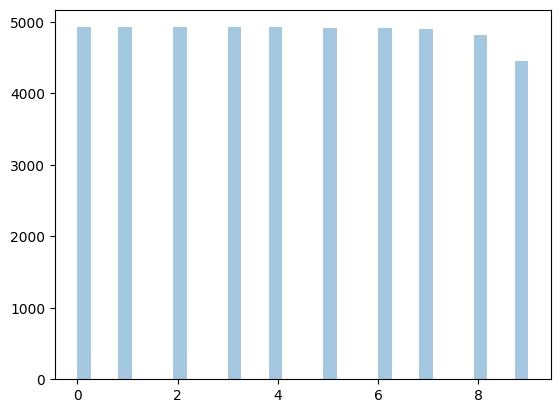

In [110]:
sns.distplot(x=pd_graph.h, kde=False)

<AxesSubplot: xlabel='h', ylabel='t'>

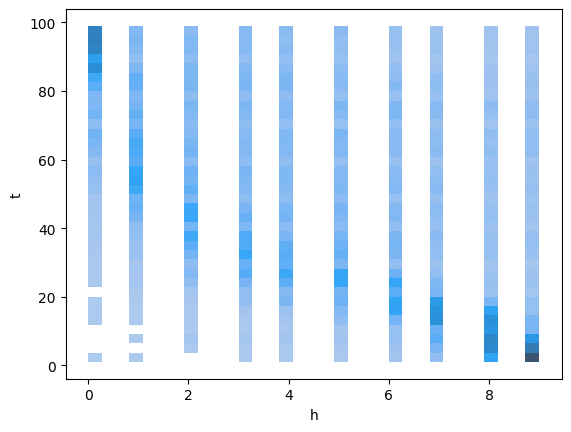

In [111]:
sns.histplot(pd_graph, x="h", y="t")

# Node2Vec Baseline

In [118]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(list(set(pd_graph.v.append(pd_graph.u))))

pd_graph.u = le.transform(pd_graph.u)
pd_graph.v = le.transform(pd_graph.v)
pd_graph

/var/folders/l3/l0vfq_n54s9d8739l34r9qv00000gn/T/ipykernel_9501/2056397769.py:4: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,u,v,t,h
0,1370,8415,82,9
1,5206,6477,39,4
2,4760,5521,25,4
3,4163,7660,37,1
4,5003,5206,59,9
...,...,...,...,...
48604,2028,11429,98,4
48605,1011,12176,89,6
48606,150,1069,83,5
48607,4496,8792,75,8


In [120]:
adj_list = [[] for i in range(pd_graph.u.append(pd_graph.v).unique().shape[0])]
src_dst = list(map(list, list(pd_graph[["u", "v"]].to_numpy())))

for u, v in src_dst:
    adj_list[u].append(v)
    adj_list[v].append(u)

adj_list

/var/folders/l3/l0vfq_n54s9d8739l34r9qv00000gn/T/ipykernel_9501/1024613966.py:1: FutureWarning:

The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[[10127],
 [4444],
 [10270],
 [9532, 2512, 7944, 13250, 4246, 10772, 7471, 9347, 4092, 1146, 3968, 3890],
 [207, 10719, 2756, 729, 7652],
 [4382],
 [12269],
 [5092],
 [6584],
 [10149,
  8279,
  9681,
  11065,
  3012,
  10703,
  11072,
  6830,
  8049,
  2075,
  638,
  10487,
  5223,
  7596,
  7694,
  10201,
  11386,
  11378,
  12927,
  12686,
  2415,
  2566,
  4039,
  4015,
  12070,
  4655,
  2360,
  11387,
  8533,
  8749,
  8865,
  5098,
  4589,
  2752,
  2586,
  8200,
  1116,
  798,
  11007,
  6651,
  6226,
  13242,
  10381,
  1518,
  3353,
  2627,
  9292,
  8102,
  10225,
  13200,
  1359,
  4379,
  12229,
  10485,
  3608,
  3883,
  8724,
  11059],
 [7756, 1075, 5769, 13039, 6767, 8558, 11578, 11825, 2694, 10361],
 [12791],
 [934],
 [10270, 4674],
 [7860, 2237],
 [6549,
  8771,
  8157,
  8899,
  6955,
  799,
  1496,
  6309,
  5098,
  9651,
  9116,
  2510,
  13446,
  8969,
  10225,
  5285,
  3608,
  10573],
 [3524],
 [12741],
 [12562],
 [12304, 6655, 6829, 1703],
 [10772, 6575, 7317, 1

In [121]:
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score

import os
import networkx as nx
import numpy as np
import pandas as pd

from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from stellargraph import datasets
from IPython.display import display, HTML

In [122]:
G = nx.from_pandas_edgelist(pd_graph, "u", "v", ["t", "h"])
G

In [123]:
from node2vec import Node2Vec

node2vec = Node2Vec(
    G, 
    dimensions=32, 
    num_walks=256,
    walk_length=16, 
    seed=103, 
    p=2, 
    q=1
).fit()

Computing transition probabilities:   0%|          | 0/13489 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|██████████████| 256/256 [07:34<00:00,  1.77s/it]


In [124]:
node_embeddings = node2vec.wv.vectors
node_embeddings

array([[ 0.35034552, -0.20017675,  0.31131378, ..., -0.22135833,
        -0.25158516, -0.02400179],
       [ 1.2535002 , -1.2212372 , -0.9016762 , ..., -0.1262827 ,
        -0.48919806, -1.1978648 ],
       [ 0.06618943, -0.38268995, -0.33586204, ...,  0.96978164,
         0.62259626,  0.2705372 ],
       ...,
       [ 0.2493044 ,  0.03586792,  0.5906348 , ..., -0.2634034 ,
        -1.2795922 ,  0.3681386 ],
       [ 0.32201776, -0.9508733 ,  0.37861407, ..., -0.11298836,
         0.13056487,  0.52107155],
       [ 1.1413931 , -0.21569432,  0.59222907, ..., -0.5644532 ,
        -1.1220522 ,  0.8705789 ]], dtype=float32)

In [125]:
node_embeddings.shape

(13489, 32)

In [126]:
# Apply t-SNE transformation on node embeddings
tsne = TSNE(n_components=3, random_state=42)
weighted_node_embeddings_3d = tsne.fit_transform(node_embeddings)

In [127]:
import plotly.express as px

fig = px.scatter_3d(x=weighted_node_embeddings_3d[:, 0], 
                    y=weighted_node_embeddings_3d[:, 1], 
                    z=weighted_node_embeddings_3d[:, 2])
fig.show()

In [128]:
from sklearn.neighbors import KDTree

kdtree = KDTree(node_embeddings, leaf_size=2)

In [129]:
dist, ind = kdtree.query(node_embeddings, k=50)
ind

array([[    0, 13396, 13394, ..., 12053, 12126, 12207],
       [    1,  9590,  9437, ...,  9405,  9547,  9612],
       [    2,  9871,  9873, ...,  9738, 10089, 10031],
       ...,
       [13486,  1574,  1753, ...,  5575,  1405,   451],
       [13487, 13471,   167, ...,   188,   862,   707],
       [13488,  1548,  1638, ...,  1211,  2197,  8844]])

In [130]:
ind.shape

(13489, 50)

In [131]:
preds = [[] for i in range(ind.shape[0])]

for i in tqdm(range(ind.shape[0])):
    node_preds = [el for el in ind[i][1:] if el not in adj_list[i]][:10]
    preds[i] = node_preds

preds

100%|██████████████████████████████████| 13489/13489 [00:00<00:00, 72873.81it/s]


[[13396, 13394, 13410, 13257, 13279, 13347, 13338, 13364, 13393, 13420],
 [9590, 9437, 9450, 9760, 9653, 9444, 9423, 9568, 9438, 9489],
 [9871, 9873, 9967, 9787, 9888, 9672, 9752, 9773, 9930, 9874],
 [13031, 13016, 13128, 13167, 13019, 13029, 13242, 13047, 10401, 11346],
 [12282, 12293, 12252, 12492, 12327, 12434, 12338, 12375, 12444, 12289],
 [9503, 9399, 9594, 9238, 9359, 9493, 9406, 9256, 9528, 9546],
 [12466, 209, 47, 132, 118, 13, 3283, 12599, 708, 2849],
 [13409, 13380, 12466, 371, 12370, 289, 777, 221, 2783, 94],
 [13381, 11017, 348, 2209, 11616, 67, 10886, 6146, 10760, 10183],
 [11193, 11197, 11213, 11407, 11120, 11055, 11149, 11006, 11263, 11204],
 [13262, 13259, 13183, 13202, 13265, 13251, 13222, 10796, 10963, 7560],
 [13481, 87, 30, 337, 59, 17, 246, 132, 16, 288],
 [467, 870, 276, 266, 2690, 304, 8011, 660, 86, 46],
 [12521, 209, 11114, 2849, 3370, 3550, 7848, 2685, 118, 12426],
 [13425, 814, 1414, 8677, 731, 9441, 1666, 11936, 6, 1023],
 [8954, 9083, 9079, 9333, 9038, 9055

In [133]:
for i in tqdm(range(len(preds))):
    preds[i] = le.inverse_transform(preds[i])

100%|███████████████████████████████████| 13489/13489 [00:02<00:00, 4552.68it/s]


In [135]:
preds = list(map(list, preds))
preds

[[84175, 84164, 84246, 83372, 83483, 83888, 83834, 84001, 84163, 84324],
 [60596, 59524, 59619, 61593, 60965, 59558, 59458, 60373, 59525, 59867],
 [62224, 62249, 62857, 61743, 62317, 61089, 61532, 61683, 62593, 62252],
 [81933, 81834, 82576, 82802, 81871, 81929, 83282, 82029, 65627, 71432],
 [77242, 77310, 77040, 78610, 77514, 78219, 77577, 77834, 78297, 77276],
 [59952, 59331, 60614, 58290, 59103, 59903, 59400, 58429, 60106, 60229],
 [78424, 1327, 263, 837, 677, 55, 20690, 79226, 4534, 18034],
 [84241, 84096, 78424, 2330, 77810, 1790, 4956, 1393, 17650, 482],
 [84110, 69248, 2212, 13872, 73120, 368, 68532, 39013, 67758, 64212],
 [70372, 70390, 70503, 71817, 69940, 69505, 70113, 69202, 70854, 70420],
 [83417, 83391, 82912, 83041, 83426, 83356, 83167, 68009, 68947, 48074],
 [84711, 445, 162, 2152, 318, 79, 1520, 837, 76, 1787],
 [2934, 5550, 1735, 1651, 16981, 1893, 50849, 4232, 439, 254],
 [78756, 1327, 69904, 18034, 21282, 22526, 49796, 16945, 677, 78154],
 [84363, 5167, 8838, 54942, 

In [137]:
user_ids = le.inverse_transform([i for i in range(len(preds))])
user_ids

array([    2,    19,    22, ..., 84723, 84731, 84739])

In [155]:
lines = [f"{user_ids[i]}: {','.join(list(map(str, preds[i])))}" for i in tqdm(range(len(user_ids)))]
lines


100%|█████████████████████████████████| 13489/13489 [00:00<00:00, 103292.59it/s]


['2: 84175,84164,84246,83372,83483,83888,83834,84001,84163,84324',
 '19: 60596,59524,59619,61593,60965,59558,59458,60373,59525,59867',
 '22: 62224,62249,62857,61743,62317,61089,61532,61683,62593,62252',
 '25: 81933,81834,82576,82802,81871,81929,83282,82029,65627,71432',
 '26: 77242,77310,77040,78610,77514,78219,77577,77834,78297,77276',
 '29: 59952,59331,60614,58290,59103,59903,59400,58429,60106,60229',
 '31: 78424,1327,263,837,677,55,20690,79226,4534,18034',
 '33: 84241,84096,78424,2330,77810,1790,4956,1393,17650,482',
 '38: 84110,69248,2212,13872,73120,368,68532,39013,67758,64212',
 '40: 70372,70390,70503,71817,69940,69505,70113,69202,70854,70420',
 '46: 83417,83391,82912,83041,83426,83356,83167,68009,68947,48074',
 '50: 84711,445,162,2152,318,79,1520,837,76,1787',
 '51: 2934,5550,1735,1651,16981,1893,50849,4232,439,254',
 '55: 78756,1327,69904,18034,21282,22526,49796,16945,677,78154',
 '67: 84363,5167,8838,54942,4703,59540,10546,75105,31,6498',
 '72: 56575,57282,57260,58953,57012,57

In [156]:
with open("preds.txt", "w") as fout:
    print("\n".join(lines), file=fout)